# Clustering based on mixture models



# I. Gaussian mixture models

## 1. Iris Data

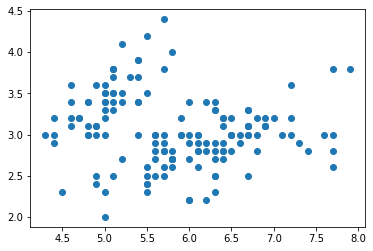

In [96]:
import numpy as np
import scipy

from sklearn import datasets
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture
from sklearn.mixture import GaussianMixture

iris = datasets.load_iris()
X=iris.data

plt.scatter(X[:,0],X[:,1])

In [97]:
colors = ['orange', 'magenta', 'blue']

In [98]:
estimators = {cov_type: GaussianMixture(n_components=3,
              covariance_type=cov_type, max_iter=20)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

#plt.figure(figsize=(20, 20))

#plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
   #                 left=.01, right=.99)
estimators

{'spherical': GaussianMixture(covariance_type='spherical', max_iter=20, n_components=3),
 'diag': GaussianMixture(covariance_type='diag', max_iter=20, n_components=3),
 'tied': GaussianMixture(covariance_type='tied', max_iter=20, n_components=3),
 'full': GaussianMixture(max_iter=20, n_components=3)}

In [99]:
estimators.items()

dict_items([('spherical', GaussianMixture(covariance_type='spherical', max_iter=20, n_components=3)), ('diag', GaussianMixture(covariance_type='diag', max_iter=20, n_components=3)), ('tied', GaussianMixture(covariance_type='tied', max_iter=20, n_components=3)), ('full', GaussianMixture(max_iter=20, n_components=3))])

In [100]:
def find_permutation(n_clusters, real_labels, labels):
    permutation=[]
    for i in range(n_clusters):
        idx = labels == i
        new_label=scipy.stats.mode(real_labels[idx])[0][0]  # Choose the most common label among data points in the cluster
        permutation.append(new_label)
    return permutation

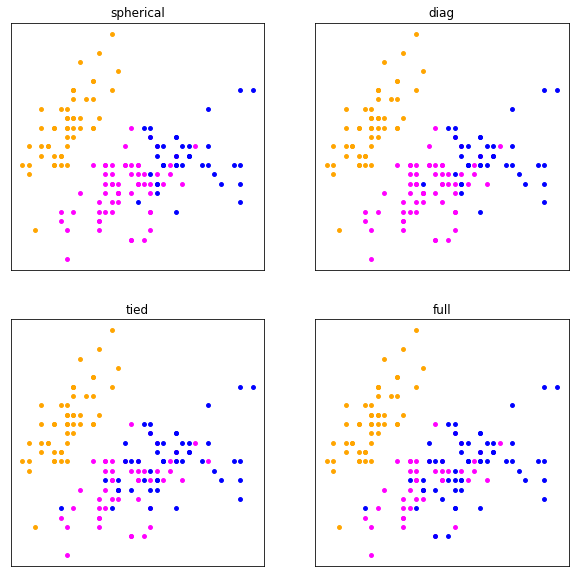

In [101]:
plt.figure(figsize=(10, 10))

for index, (name, estimator) in enumerate(estimators.items()):

    res = estimator.fit(X)
    cla=res.predict(X)
    permutation = find_permutation(3, iris.target, cla)
    cla_perm = np.array([permutation[label] for label in cla])
        
    h = plt.subplot(2, 2, index + 1)

    for n, color in enumerate(colors):
        plt.scatter(X[cla_perm == n, 0], X[cla_perm == n, 1], s=15, color=color)
   
    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.show()


## 2. Model selection, Gaussian simulated data 

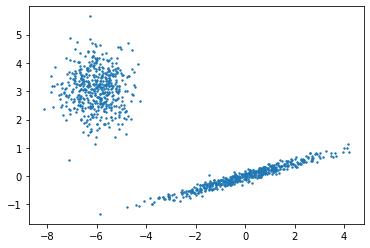

In [102]:
import itertools

# Number of samples per component
n_samples = 500

# Simulated data with two components

C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

plt.scatter(X[:,0],X[:,1],s=2)


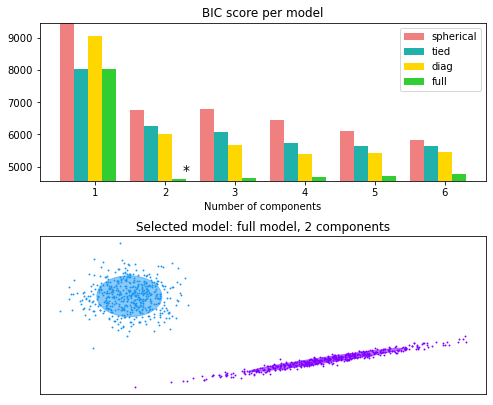

In [107]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        gmm = mixture.GaussianMixture(n_components=n_components,covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)



color_iter = itertools.cycle(['lightcoral', 'lightseagreen', 'gold','limegreen'])

rb = plt.get_cmap('rainbow')
colors = rb(np.linspace(0, 1.0, len(n_components_range)))
clf = best_gmm
bars = []

# Barplot of BIC scores

plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range): (i + 1) * len(n_components_range)], width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

# Plot the best model
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,colors)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title('Selected model: full model, 2 components')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

Try to perform clustering with model selection on several other Gaussian datasets, with different dimensions and numbers of components.

## 3. Data from Moodle 

Try clustering based on mixtures models on all the datasets available on Moodle, which were used last time with k-means.

# II. Latent variable model

Search how to deal with qualitative variables et propose an example of clustering based on a multinomial mixture model.